In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Use sample for random rows

In [6]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13846,-117.35,34.50,10.0,2163.0,392.0,1174.0,362.0,3.3750,98000.0,INLAND
10166,-117.93,33.90,30.0,2629.0,331.0,956.0,319.0,9.9071,500001.0,<1H OCEAN
13003,-121.27,38.67,15.0,2116.0,524.0,866.0,519.0,2.7388,111600.0,INLAND
16513,-121.22,37.81,17.0,2879.0,542.0,1802.0,530.0,3.6378,126100.0,INLAND
15398,-117.15,33.20,16.0,2690.0,459.0,1253.0,393.0,4.0328,294600.0,<1H OCEAN


#### Target Variable is median_house_value

In [7]:
housing_data.shape

(20640, 10)

In [8]:
housing_data = housing_data.dropna()

In [9]:
housing_data.shape

(20433, 10)

In [11]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Text(0, 0.5, 'Median house value')

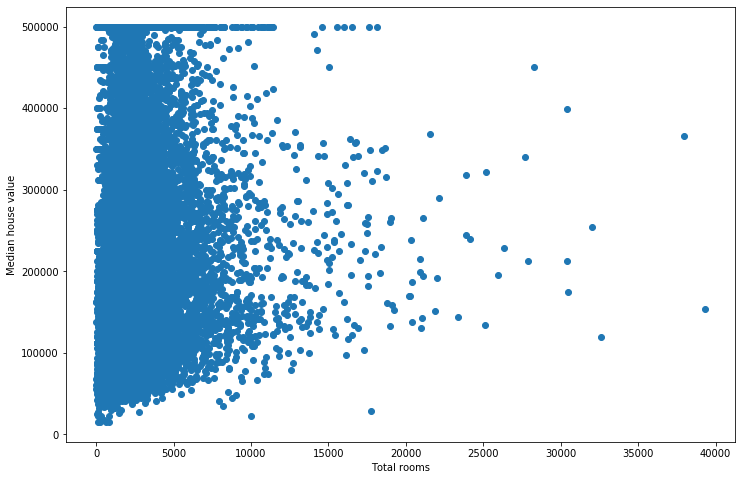

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])

plt.xlabel('Total rooms')
plt.ylabel('Median house value')

Text(0, 0.5, 'Median house value')

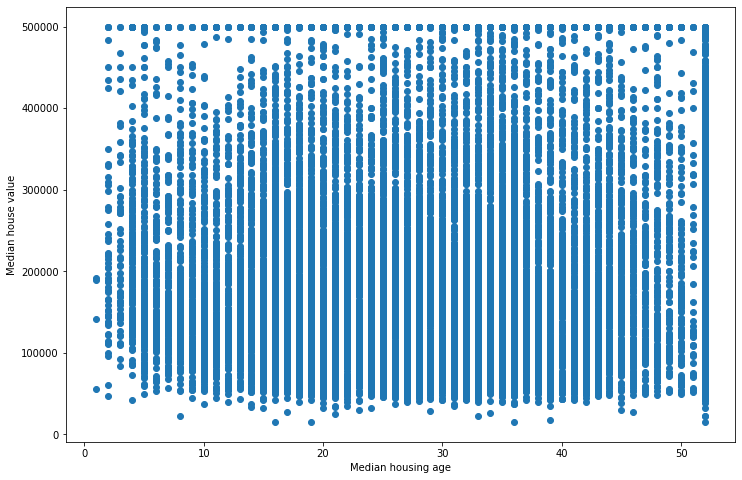

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(housing_data['housing_median_age'], housing_data['median_house_value'])

plt.xlabel('Median housing age')
plt.ylabel('Median house value')

Text(0, 0.5, 'Median house value')

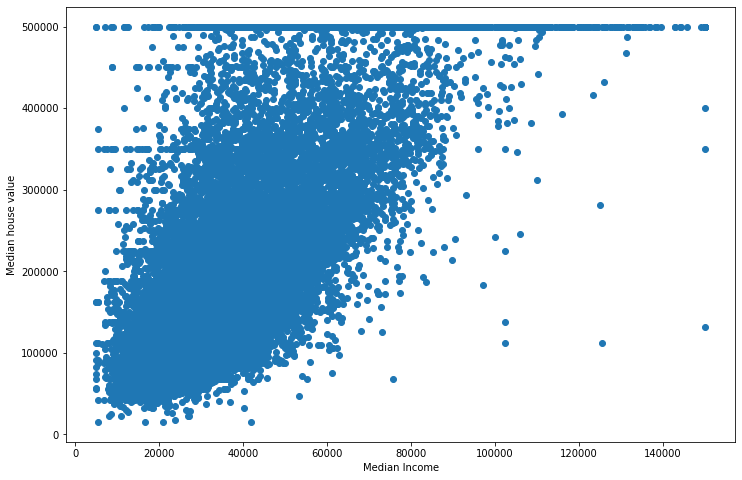

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(housing_data['median_income'] * 10000, housing_data['median_house_value'])

plt.xlabel('Median Income')
plt.ylabel('Median house value')

In [22]:
## There is a pattern above so there is a corelation between 'Median Income' & 'Median house Value'

In [18]:
housing_data_corr = housing_data.corr()

housing_data_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


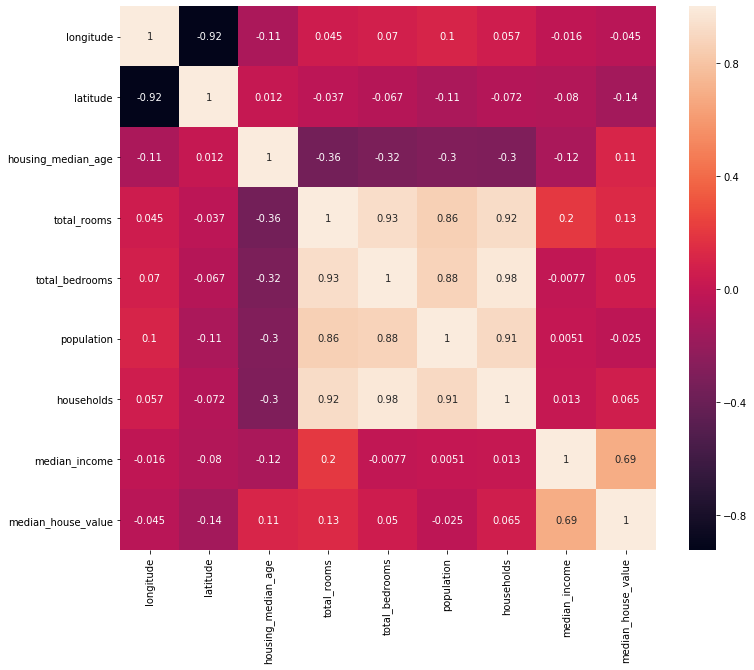

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(housing_data_corr, annot=True)